In [1]:
from keras.layers import Conv2D, SeparableConv2D, Input
from keras.models import Model

Using TensorFlow backend.


In [2]:
input_image = Input((224, 224, 3))
feature_maps = Conv2D(filters=32, kernel_size=(3,3))(input_image)
feature_maps2 = Conv2D(filters=64, kernel_size=(3,3))(feature_maps)
model = Model(inputs=input_image, outputs=feature_maps2)

W0802 18:38:50.193936 22464 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 18:38:50.203742 22464 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 18:38:50.203742 22464 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
model.summary()

# For Conv2D: output_channels * (input_channels * window_size + 1) == number_parameters
# For Dense: output_size * (input_size + 1) == number_parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


## 可以看到經過兩次 Conv2D，如果沒有設定 padding="SAME"，圖就會越來越小，同時特徵圖的 channel 數與 filters 的數量一致

In [4]:
input_image = Input((224, 224, 3))
feature_maps = SeparableConv2D(filters=32, kernel_size=(3,3))(input_image)
feature_maps2 = SeparableConv2D(filters=64, kernel_size=(3,3))(feature_maps)
model = Model(inputs=input_image, outputs=feature_maps2)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 222, 222, 32)      155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 220, 220, 64)      2400      
Total params: 2,555
Trainable params: 2,555
Non-trainable params: 0
_________________________________________________________________


## 可以看到使用 Seperable Conv2D，即使模型設置都一模一樣，但是參數量明顯減少非常多！

## 作業

請閱讀 Keras 官方範例 [mnist_cnn.py](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)  

並回答下列問題。僅有 70 行程式碼，請確保每一行的程式碼你都能夠理解目的

1. 是否有對資料做標準化 (normalization)? 如果有，在哪幾行?

   [ANS] 有，在37, 38行，像素是由0~255的數值表示，因此對每個pixel都除以255來做標準化
   
   
2. 使用的優化器 Optimizer 為何?

   [ANS] Adadelta
   

3. 模型總共疊了幾層卷積層?

   [ANS] 2層CNN


4. 模型的參數量是多少?

   [ANS] Total params: 1,199,882

   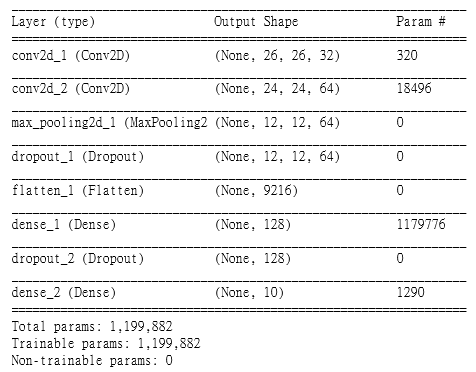